In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

<h2> Feature Selection on Autism Biolog Dataset</h2>

<h3>Loading the Data</h3>


1. Loaded the dataset 
2. Drop the Columns which aren't required


In [2]:
 # read the csv file from the link provided
 # drop Negative Controls from the dataset, since Negative Controls are not needed
 # drop the column that is not required from the dataset(CMS#)

df = pd.read_csv("C:/AutisticDisorderProject/TestTrain5050data.csv")
df.drop(list(df.filter(regex='Negative Control')), axis=1, inplace=True)


asd_data = df.drop(columns='CMS#',axis=1)
# drop the 'CMS' column

asd_data.head()

,a-Cyclodextrin,Dextrin,Glycogen,Maltitol,Maltotriose,Maltose,D-Trehalose,D-Cellobiose,Gentiobiose,D-Glucose-6-Phosphate,...,Adenosine.4,Adenosine.5,Adenosine.6,Gly-His-Lys acetate salt,Gly-His-Lys acetate salt.1,Gly-His-Lys acetate salt.2,Gly-His-Lys acetate salt.3,Gly-His-Lys acetate salt.4,Gly-His-Lys acetate salt.5,Diagnosis
0,0.262591,0.997133,0.986968,0.277475,1.074956,1.089453,0.405887,0.311380,0.353178,0.455127,...,1.102738,1.095119,1.080465,0.997059,1.088651,0.986823,0.97434,0.951473,0.869257,1
1,0.239292,0.911528,1.013144,0.300022,1.022068,1.135745,0.392186,0.324281,0.310849,0.463682,...,1.181000,1.122300,1.235600,0.963800,0.943900,0.919300,0.90680,0.933600,0.886200,1
2,0.312369,1.408409,1.419281,0.379099,0.362415,0.169417,0.256599,0.111319,0.167910,0.617430,...,1.322800,0.753800,0.699300,1.188000,1.210800,1.121900,1.06560,1.046800,0.711000,1
3,0.188019,0.592031,0.413213,0.170653,0.253267,0.182602,0.158959,0.146343,0.134804,0.329473,...,0.615300,0.669000,0.572100,0.641000,0.633900,0.622100,0.61450,0.576700,0.546200,1
4,0.253399,1.352917,0.949392,0.251156,0.444184,0.218518,0.137328,0.174540,0.155979,0.680785,...,1.401038,1.367023,1.305691,1.234141,1.515057,1.158642,1.21869,1.183060,1.089372,1


In [3]:
# strip the whitespace in the column names
asd_data.columns = asd_data.columns.str.strip()
asd_data.shape

(100, 735)

<h3>Scaling the Data</h3>

In [4]:
# hint: Use MinMaxScaler for scaling
def scale_data(data):
    # store all the columns
    cols = data.columns
    # create a scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # fit and transform the data
    scaled_data = scaler.fit_transform(data)
    
    # store the transformed data in a dataframe and return it.
    transformed_data = pd.DataFrame(scaled_data)
    transformed_data.columns = cols
    return transformed_data


In [5]:
transformed_data = scale_data(asd_data)
transformed_data.head()

,a-Cyclodextrin,Dextrin,Glycogen,Maltitol,Maltotriose,Maltose,D-Trehalose,D-Cellobiose,Gentiobiose,D-Glucose-6-Phosphate,...,Adenosine.4,Adenosine.5,Adenosine.6,Gly-His-Lys acetate salt,Gly-His-Lys acetate salt.1,Gly-His-Lys acetate salt.2,Gly-His-Lys acetate salt.3,Gly-His-Lys acetate salt.4,Gly-His-Lys acetate salt.5,Diagnosis
0,0.423145,0.611943,0.673013,0.655346,0.798260,0.741404,0.599716,0.665656,0.754709,0.489498,...,0.553747,0.529862,0.554927,0.580709,0.632509,0.616020,0.553273,0.584858,0.574413,1.0
1,0.354959,0.554366,0.692812,0.725226,0.754946,0.775075,0.575320,0.703234,0.652358,0.503952,...,0.597941,0.544887,0.644687,0.558909,0.537492,0.568644,0.508922,0.573468,0.585870,1.0
2,0.568819,0.888562,1.000000,0.970318,0.214713,0.072198,0.333904,0.082914,0.306733,0.763727,...,0.678014,0.341184,0.334388,0.705864,0.712690,0.710792,0.613200,0.645610,0.467408,1.0
3,0.204909,0.339476,0.239045,0.324258,0.125324,0.081788,0.160053,0.184931,0.226685,0.277191,...,0.278496,0.294307,0.260791,0.347324,0.334002,0.360123,0.316979,0.346016,0.355979,1.0
4,0.396242,0.851239,0.644593,0.573772,0.281679,0.107912,0.121537,0.267066,0.277886,0.870772,...,0.722194,0.680168,0.685241,0.736108,0.912411,0.736572,0.713729,0.732448,0.723244,1.0


5. Perform train_test_split

In [37]:
# select all rows of all columns except the column 'Diagnosis'
X = transformed_data.loc[:, :'Gly-His-Lys acetate salt.5']

# the column we are going to classify
y = transformed_data['Diagnosis']

# do the train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# convert y_train and y_test into dataframes
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

y_train = y_train.astype('int')

<h3>Shortlisting Classifiers</h3>

Use lazypredict to get a shortlist on best possible classifiers

In [38]:
#!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 19.18it/s]


Print the results

In [39]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.73               0.72     0.72      0.73   
LinearDiscriminantAnalysis         0.70               0.69     0.69      0.69   
LinearSVC                          0.70               0.69     0.69      0.69   
RidgeClassifierCV                  0.70               0.69     0.69      0.69   
PassiveAggressiveClassifier        0.70               0.69     0.69      0.69   
CalibratedClassifierCV             0.67               0.66     0.66      0.66   
RidgeClassifier                    0.67               0.65     0.65      0.65   
SGDClassifier                      0.63               0.63     0.63      0.63   
NearestCentroid                    0.63               0.63     0.63      0.63   
AdaBoostClassifier                 0.63               0.63     0.63      0.63   
LGBMClassifier              

<h3>Alternative Models : </h3> XGBoost Classifier, Linear Discriminant Analysis, Logistic Regression

<h4>XGBoost Classifier</h4> 

Accuracy for XGBClassifier:  0.6333333333333333
Precision for XGBClassifier:  0.631578947368421
Recall for XGBClassifier:  0.75
Confusion matrix, without normalization
[[ 7  7]
 [ 4 12]]
Normalized confusion matrix
[[0.5  0.5 ]
 [0.25 0.75]]


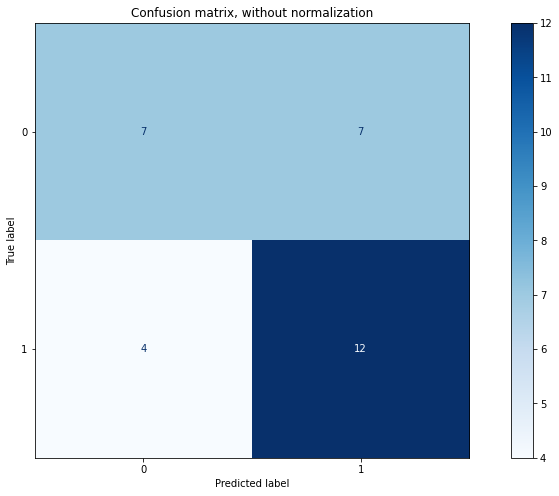

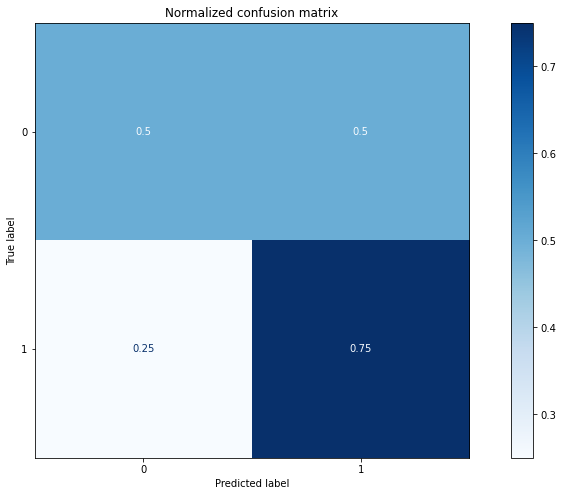

In [53]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred = pd.DataFrame(y_pred)

print("Accuracy for XGBClassifier: ",accuracy_score(y_test,y_pred))
print("Precision for XGBClassifier: ",precision_score(y_test,y_pred))
print("Recall for XGBClassifier: ",recall_score(y_test,y_pred))

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        xgb,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<h4>Linear Discriminant Analysis</h4>

Accuracy for Linear Discriminant Analysis:  0.7
Precision for Linear Discriminant Analysis:  0.6842105263157895
Recall for Linear Discriminant Analysis:  0.8125
Confusion matrix, without normalization
[[ 8  6]
 [ 3 13]]
Normalized confusion matrix
[[0.57142857 0.42857143]
 [0.1875     0.8125    ]]


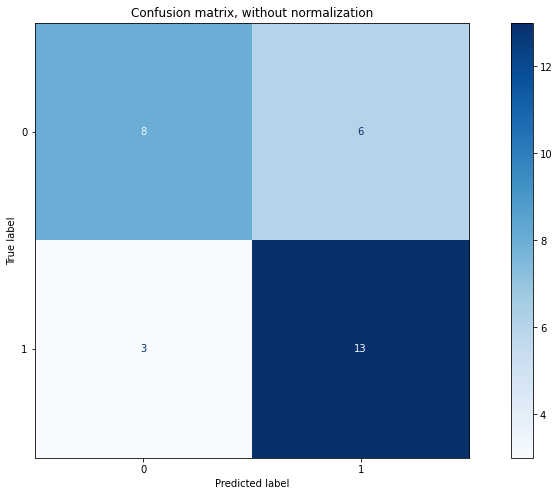

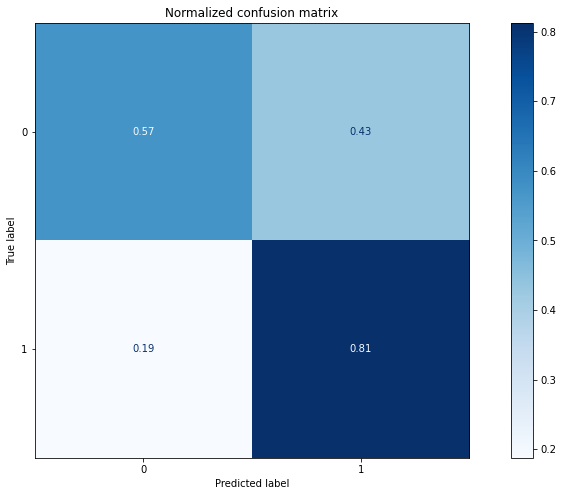

In [57]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
y_pred = pd.DataFrame(y_pred)

print("Accuracy for Linear Discriminant Analysis: ",accuracy_score(y_test,y_pred))
print("Precision for Linear Discriminant Analysis: ",precision_score(y_test,y_pred))
print("Recall for Linear Discriminant Analysis: ",recall_score(y_test,y_pred))

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lda,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<h4>Logistic Regression</h4>

Accuracy for Logistic Regression:  0.7333333333333333
Precision for Logistic Regression:  0.7
Recall for Logistic Regression:  0.875
Confusion matrix, without normalization
[[ 8  6]
 [ 2 14]]
Normalized confusion matrix
[[0.57142857 0.42857143]
 [0.125      0.875     ]]


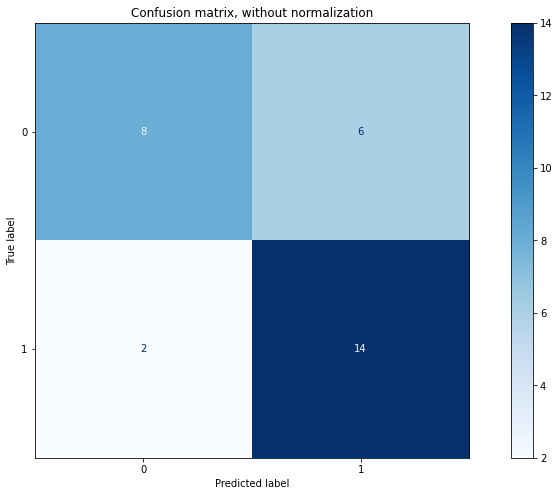

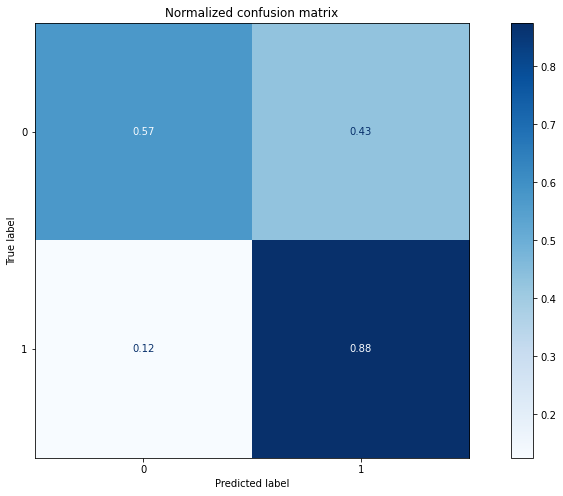

In [58]:
lr = LogisticRegression(solver="lbfgs", max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = pd.DataFrame(y_pred)
print("Accuracy for Logistic Regression: ",accuracy_score(y_test,y_pred))
print("Precision for Logistic Regression: ",precision_score(y_test,y_pred))
print("Recall for Logistic Regression: ",recall_score(y_test,y_pred))

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lr,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

y_pred = lr.predict(X_test)
y_pred = pd.DataFrame(y_pred)
print("Accuracy for Logistic Regression: ",accuracy_score(y_test,y_pred))
print("Precision for Logistic Regression: ",precision_score(y_test,y_pred))
print("Recall for Logistic Regression: ",recall_score(y_test,y_pred))


Accuracy for Logistic Regression:  0.8666666666666667
Precision for Logistic Regression:  0.8571428571428571
Recall for Logistic Regression:  0.8571428571428571


### Linear SVC

Accuracy for LinearSVC:  0.7
Precision for LinearSVC:  0.6666666666666666
Recall for LinearSVC:  0.875
Confusion matrix, without normalization
[[ 7  7]
 [ 2 14]]
Normalized confusion matrix
[[0.5   0.5  ]
 [0.125 0.875]]


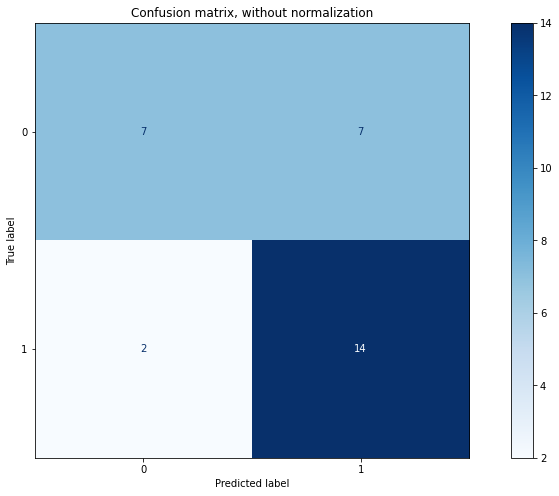

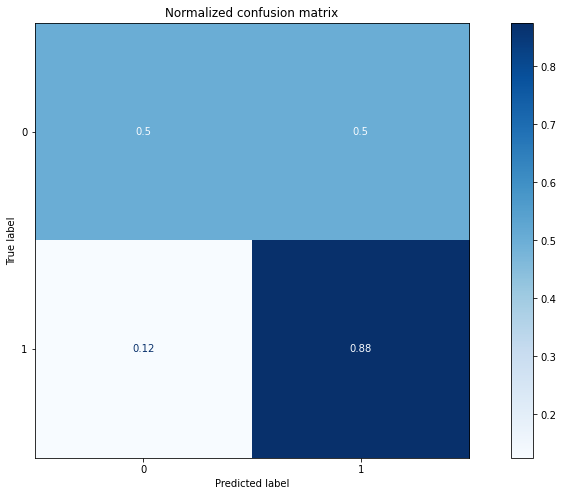

Score:  1.0
              precision    recall  f1-score   support

         0.0       0.78      0.50      0.61        14
         1.0       0.67      0.88      0.76        16

    accuracy                           0.70        30
   macro avg       0.72      0.69      0.68        30
weighted avg       0.72      0.70      0.69        30



In [63]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(verbose=0)

lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
y_pred = pd.DataFrame(y_pred)
print("Accuracy for LinearSVC: ",accuracy_score(y_test,y_pred))
print("Precision for LinearSVC: ",precision_score(y_test,y_pred))
print("Recall for LinearSVC: ",recall_score(y_test,y_pred))

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lsvc,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


cr = classification_report(y_test, y_pred)
print(cr)

Accuracy for Random Forest Classifier:  0.5333333333333333
Precision for Random Forest Classifier:  0.55
Recall for Random Forest Classifier:  0.6875
Confusion matrix, without normalization
[[ 5  9]
 [ 5 11]]
Normalized confusion matrix
[[0.35714286 0.64285714]
 [0.3125     0.6875    ]]


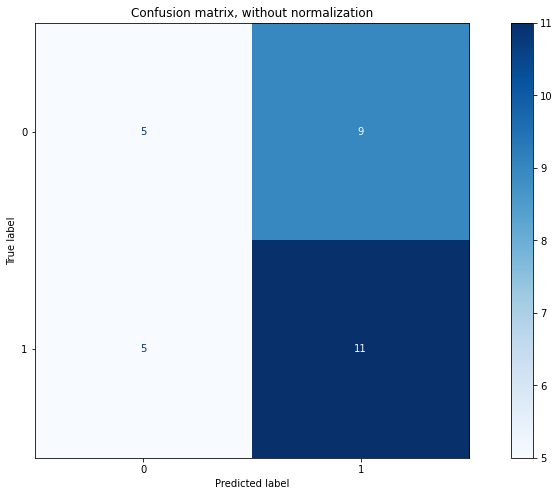

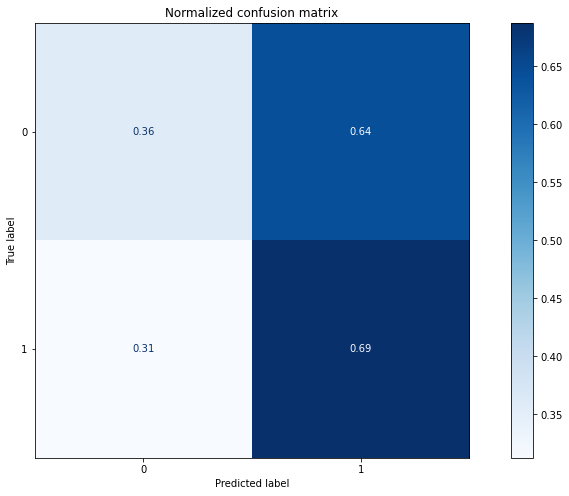

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred = pd.DataFrame(y_pred)

print("Accuracy for Random Forest Classifier: ",accuracy_score(y_test,y_pred))
print("Precision for Random Forest Classifier: ",precision_score(y_test,y_pred))
print("Recall for Random Forest Classifier: ",recall_score(y_test,y_pred))

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
